# Práctica 1 Parte 2

La segunda parte consiste en implementar métodos numéricos para resolver problemas de optimización estudiados en la primera parte.


## Problema de Optimización

Se propone resolver un problema de optimización de flujo máximo, en el que tenemos un nodo inicial llamado fuente hacia un nodo terminal que llamaremos sumidero. El objetivo consiste en encontrar el camino en el que se maximice la capacidad de todos los arcos del grafo.

Podemos resolver este problema usando varios métodos, por ejemplo el Algoritmo Naive Greedy o, el que usaremos, el Algoritmo de Ford Fulkerson.

La maximización de flujos es uno de los problemas clásicos de la Investigación de Operaciones, la cual, como vimos en clase, proviene de actividades bélicas.

Los modelos de redes nos ayudan a visualizar el problema y a tomar una decisión basada en la optimalidad de nuestro algoritmo, lo que podría mejorar o dar mayor aprovechamiento a los flujos acorde a su capacidad, podríamos crear nuevas vialidades y deshacernos de las que no se aprovechan bien. Al maximizar el flujo, podemos maximizar también los recursos.



### Problema del flujo máximo

Este tipo de problemas (Problema del Flujo Máximo) busca determinar el flujo máximo entre un nodo fuente y un nodo destino, los cuales están enlazados a través de una red, con arcos que tienen capacidad finita.

Desde el punto de vista de la programación lineal, podemos plantear la situación de la siguiente forma:

#### Variables de Decisión:

$$x_{ij}: unidades - que - fluyen - desde - el - nodo - i - al - j$$

#### Función Objetivo: 

Maximizar las unidades que salen del nodo de origen o fuente (s) a los que éste conecta (j, k, l,...) o alternativamente maximizar las unidades que llegan al nodo de destino o sumidero (t) desde los que conectan a él.

#### Restricciones:

* Restricciones de Flujo Máximo: La cantidad de unidades que sale de cada nodo de origen a un nodo de destino no puede superar la capacidad detallada en el arco, por ejemplo, del nodo 1 al nodo 2 sólo se pueden enviar 7 unidades.

* Restricciones de Balance de Flujo en los Nodos: Debe existir un equilibrio entre la cantidad de unidades que llega a un nodo y las que de éste salen.

* No Negatividad e Integralidad: Las variables de decisión deben cumplir las condiciones de no negatividad. Adicionalmente exigiremos que éstas adopten valores enteros aún cuando se podría flexibilizar dicha situación lo que daría origen a un problema de Programación Lineal.

## Teorema de Ford Fulkerson

_En cualquier red, el flujo máximo que fluye de la fuente al destino es igual a la capacidad del corte mínimo que separa a la fuente del destino_.

Esto quiere decir que el algoritmo concluye cuando el flujo máximo es devuelto y su costo depende del costo de cada iteración y del número de estas.

## Algoritmo de Ford Fulkerson

Lo que se propone con el algoritmo de Ford-Fulkerson es buscar caminos en los que se pueda aumentar el flujo, hasta que se alcance el flujo máximo o el camino con la capacidad máxima de los arcos. Los creadores de este algoritmo son: L. R. Ford, Jr. y D. R. Fulkerson. La idea es encontrar una ruta de penetración con un flujo positivo neto que una los nodos origen y destino.

Una red de flujo es un grafo dirigido $G (V,E)$ donde cada arco $(u,v)$ perteneciente a $E$ tiene una capacidad no negativa. 

Se distinguen dos nodos: 
* la fuente o nodo s,
* y el sumidero o nodo t

Si existen múltiples fuentes y sumideros, el problema se puede simplificar añadiendo una fuente común y un sumidero común.

La idea que motiva a este algoritmo es la siguiente: siempre que haya una ruta desde la fuente (nodo de inicio) hasta el sumidero (nodo final), con capacidad disponible en todos los bordes de la ruta, enviamos flujo a lo largo de una de las rutas. Luego encontramos otro camino y así sucesivamente hasta agotar todos los caminos por los que podríamos pasar. Un camino con capacidad disponible se llama camino de aumento.

Después de cada paso del algoritmo, debemos mantener:

| Nombre | Regla | Interpretación |
| --- | --- | --- |
| Limitaciones de capacidad | $$\forall{(u, v)} \in E : f (u, v) \leq c(u, v)$$ | El flujo a lo largo de un borde no puede exceder su capacidad. |
| Simetría sesgada | $$\forall{(u, v)} \in E : f (u, v) = - f (u, v)$$ | El flujo neto de $u$ a $v$ debe ser el opuesto al flujo neto de $v$ a $u$. |
| Conservación de flujo | $$\forall u  \in V: u  \neq s \cap u  \neq t  \Rightarrow  \sum _ {w  \in V} f (u, w) = 0$$ | El flujo neto a un nodo es cero, excepto para la fuente, que "produce" flujo, y el sumidero, que "consume" flujo. |
| Valor(f) | $$ \sum _ {(s, u) \in E} f (s, u) =  \sum _ {(v, t)  \in E} f (v, t)$$ | El flujo que sale de s debe ser igual al flujo que llega a t. |

### Pseudo-algoritmo

```
def nuestro_alg_FF(G,s,t){
  """
  Entries: 
      red G=(V,E), 
      capacidad del flujo c,
      nodo receptor o fuente s,
      nodo sumidero t,
  """
  G_res = grafo_residual(G);
  for ((u_i,v_i) de E) {
      f[u_i,v_i]= 0; #para todo i
  }
  while (mientras exista alguna ruta p desde s a t en el grafo residual G_res) {
      c_f(p) = min{c_f(u,v): (u,v) está en p};
      for (cada arista (u,v) en p) {
          f[u,v]= f[u,v] + cf(p);
          f[v,u]= f[v,u] - cf(p); #el flujo puede devolverse despues
      }
      Actualizar_grafo_residual(G_res);
  }

}
```

## Uso del algoritmo

El Algoritmo propuesto nos puede ayudar con los datos que elegimos, y esperamos poder proponer mejoras al mismo, que sea un método intuitivo de flujo máximo que se utilizará para resolver un problema de electricidad.

Realizamos el algoritmo basados en otro llamado ["Búsqueda en anchura"](https://es.wikipedia.org/wiki/B%C3%BAsqueda_en_anchura). Formalmente,se trata de un algoritmo de búsqueda sin información, que expande y examina todos los nodos de un árbol sistemáticamente para buscar una solución. El algoritmo no usa ninguna estrategia heurística.

El procedimiento anterior se da como:

* Dado un vértice fuente s, Breadth-first search sistemáticamente explora los vértices de G para “descubrir” todos los vértices alcanzables desde s.

* Calcula la distancia (menor número de vértices) desde s a todos los vértices alcanzables.

* Después produce un árbol BF con raíz en s y que contiene a todos los vértices alcanzables.

* El camino desde s a cada vértice en este recorrido contiene el mínimo número de vértices. Es el camino más corto medido en número de vértices.

* Su nombre se debe a que expande uniformemente la frontera entre lo descubierto y lo no descubierto. Llega a los nodos de distancia k, sólo tras haber llegado a todos los nodos a distancia k-1.


### Ejercicio muestra

** Base de datos Uriel 

Haciendo uso del paquete `maxflow_aeiu` vamos a encontrar el flujo máximo de electricidad de la fuente: x al sumidero: z.

In [1]:
from MaxFlowAeiu.MaxFlowAeiu import MaxFlowAeiu

In [2]:
graph= [[0,10,8,0,0,0],[0,0,5,5,0,0],[0,4,0,0,10,0],
        [0,0,9,0,10,3],[0,0,0,6,0,14],[0,0,0,0,0,0]]

In [3]:
MF=MaxFlowAeiu(graph)

In [4]:
print("The maximum flow in this network is {}".format(MF.ford_fulkerson()))

The maximum flow in this network is 15


In [5]:
import matplotlib.pyplot as plt
import networkx as nx

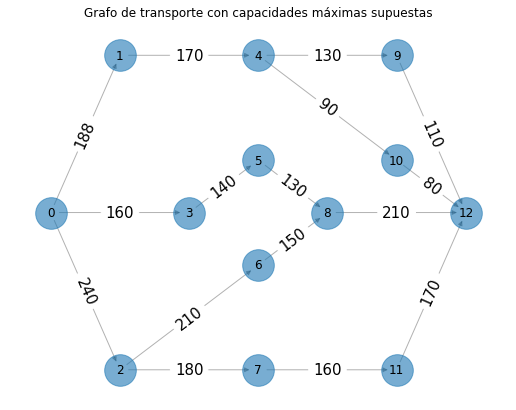

In [6]:
nodes_pos_ex_1 = [[0.09090909090909091, 0.4545454545454546],#0
                  [0.36363636363636365, 0.7272727272727273],#1
                  [0.36363636363636365, 0.1818181818181818],#2
                  [0.6363636363636364,  0.4545454545454546],#3
                  [0.9090909090909092,  0.7272727272727272],#4
                  [0.9090909090909092,  0.5454545454545454],#5
                  [0.9090909090909092,  0.3636363636363636],#6
                  [0.9090909090909092,  0.1818181818181818],#7
                  [1.181818181818182,  0.4545454545454546],#8
                  [1.454545454545455,  0.7272727272727273],#9
                  [1.454545454545455,   0.5454545454545454],#10
                  [1.454545454545455,  0.18181818181818182],#11
                  [1.727272727272728,  0.4545454545454546]]#12
nodes = range(len(nodes_pos_ex_1))
G_ex_1 = nx.DiGraph() 
G_ex_1.add_nodes_from(nodes)
edge_labels = {(0,1): 188,
               (0,2): 240,
               (0,3): 160,
               (1,4): 170,
               (2,6): 210,
               (2,7): 180,
               (3,5): 140,
               (4,9): 130,
               (4,10): 90,
               (5,8): 130,
               (6,8): 150,
               (7,11): 160,
               (8,12): 210,
               (9,12): 110,
               (10,12): 80,
               (11,12): 170,
              }    
G_ex_1.add_edges_from(edge_labels)
for e in G_ex_1.edges():
    try:
        G_ex_1[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_1[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_1, pos=nodes_pos_ex_1, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_1, pos=nodes_pos_ex_1, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_1, pos=nodes_pos_ex_1)
nx.draw_networkx_nodes(G_ex_1, pos=nodes_pos_ex_1, node_size=1000, alpha=0.6)
plt.axis("off")
plt.title("Grafo de transporte con capacidades máximas supuestas", fontdict=None, loc='center')
plt.show()        

In [7]:
G = nx.DiGraph()
G.add_edge('0','1', capacity=188.0)
G.add_edge('0','2', capacity=240.0)
G.add_edge('0','3', capacity=160.0)
G.add_edge('1','4', capacity=170.0)
G.add_edge('2','6', capacity=210.0)
G.add_edge('2','7', capacity=180.0)
G.add_edge('3','5', capacity=140.0)
G.add_edge('4','9', capacity=130.0)
G.add_edge('4','10', capacity=90.0)
G.add_edge('5','8', capacity=130.0)
G.add_edge('6','8', capacity=150.0)
G.add_edge('7','11', capacity=160.0)
G.add_edge('8','12', capacity=210.0)
G.add_edge('9','12', capacity=110.0)
G.add_edge('10','12', capacity=80.0)
G.add_edge('11','12', capacity=170.0)


A continuación, el resultado del algoritmo de flujo máximo y cómo quedaría la red.

In [8]:
from networkx.algorithms.flow import maximum_flow

In [9]:
flow_value, flow_dict = nx.maximum_flow(G, "0", "12")

In [10]:
flow_value

540.0

In [11]:
flow_dict

{'0': {'1': 170.0, '2': 240.0, '3': 130.0},
 '1': {'4': 170.0},
 '2': {'6': 80.0, '7': 160.0},
 '3': {'5': 130.0},
 '4': {'9': 110.0, '10': 60.0},
 '6': {'8': 80.0},
 '7': {'11': 160.0},
 '5': {'8': 130.0},
 '9': {'12': 110.0},
 '10': {'12': 60.0},
 '8': {'12': 210.0},
 '11': {'12': 160.0},
 '12': {}}

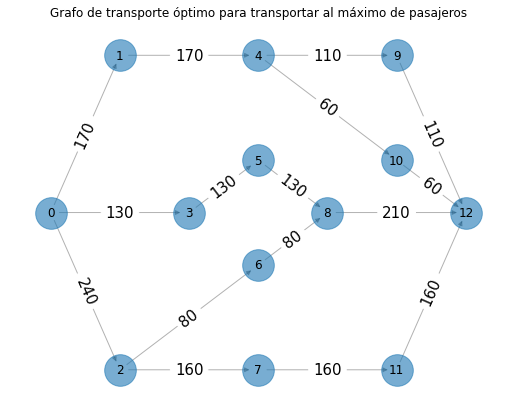

In [12]:
nodes_pos_ex_2 = [[0.09090909090909091, 0.4545454545454546],#0
                  [0.36363636363636365, 0.7272727272727273],#1
                  [0.36363636363636365, 0.1818181818181818],#2
                  [0.6363636363636364,  0.4545454545454546],#3
                  [0.9090909090909092,  0.7272727272727272],#4
                  [0.9090909090909092,  0.5454545454545454],#5
                  [0.9090909090909092,  0.3636363636363636],#6
                  [0.9090909090909092,  0.1818181818181818],#7
                  [1.181818181818182,  0.4545454545454546],#8
                  [1.454545454545455,  0.7272727272727273],#9
                  [1.454545454545455,   0.5454545454545454],#10
                  [1.454545454545455,  0.18181818181818182],#11
                  [1.727272727272728,  0.4545454545454546]]#12
nodes = range(len(nodes_pos_ex_2))
G_ex_2 = nx.DiGraph() 
G_ex_2.add_nodes_from(nodes)
edge_labels = {(0,1): 170,
               (0,2): 240,
               (0,3): 130,
               (1,4): 170,
               (2,6): 80,
               (2,7): 160,
               (3,5): 130,
               (4,9): 110,
               (4,10): 60,
               (5,8): 130,
               (6,8): 80,
               (7,11): 160,
               (8,12): 210,
               (9,12): 110,
               (10,12): 60,
               (11,12): 160,
              }    
G_ex_2.add_edges_from(edge_labels)
for e in G_ex_2.edges():
    try:
        G_ex_2[e[0]][e[1]]["weight"] = edge_labels[e]
    except:
        G_ex_2[e[1]][e[0]]["weight"] = edge_labels[(e[1],e[0])]
plt.figure(figsize=(9,7))
nx.draw_networkx_edges(G_ex_2, pos=nodes_pos_ex_2, 
                       alpha=0.3, min_source_margin=8, 
                       min_target_margin=8)
nx.draw_networkx_edge_labels(G_ex_2, pos=nodes_pos_ex_2, 
                             edge_labels = edge_labels,
                             font_size=15)
nx.draw_networkx_labels(G_ex_2, pos=nodes_pos_ex_2)
nx.draw_networkx_nodes(G_ex_2, pos=nodes_pos_ex_2, node_size=1000, alpha=0.6)
plt.axis("off") 
plt.title("Grafo de transporte óptimo para transportar al máximo de pasajeros", fontdict=None, loc='center')
plt.show()

Veamos el mismo ejercicio pero usando `Scipy`

In [13]:
# Scipy
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import maximum_flow


In [14]:
print(nx.to_scipy_sparse_matrix(G_ex_1))

  (0, 1)	188
  (0, 2)	240
  (0, 3)	160
  (1, 4)	170
  (2, 6)	210
  (2, 7)	180
  (3, 5)	140
  (4, 9)	130
  (4, 10)	90
  (5, 8)	130
  (6, 8)	150
  (7, 11)	160
  (8, 12)	210
  (9, 12)	110
  (10, 12)	80
  (11, 12)	170


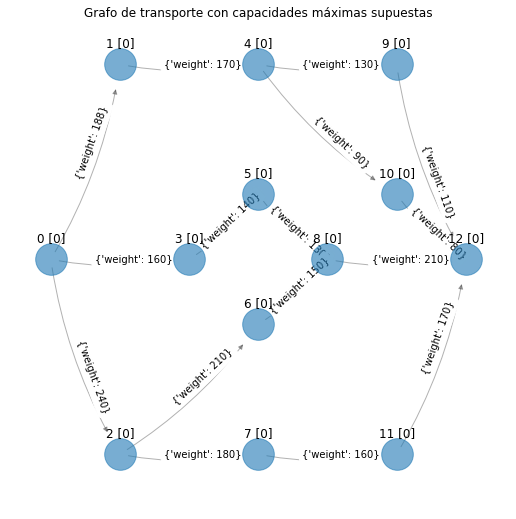

In [15]:
nodes_pos = [[0.09090909090909091, 0.4545454545454546],#0
                  [0.36363636363636365, 0.7272727272727273],#1
                  [0.36363636363636365, 0.1818181818181818],#2
                  [0.6363636363636364,  0.4545454545454546],#3
                  [0.9090909090909092,  0.7272727272727272],#4
                  [0.9090909090909092,  0.5454545454545454],#5
                  [0.9090909090909092,  0.3636363636363636],#6
                  [0.9090909090909092,  0.1818181818181818],#7
                  [1.181818181818182,  0.4545454545454546],#8
                  [1.454545454545455,  0.7272727272727273],#9
                  [1.454545454545455,   0.5454545454545454],#10
                  [1.454545454545455,  0.18181818181818182],#11
                  [1.727272727272728,  0.4545454545454546]]#12

nodes = ['0', '1', '2', '3', '4','5','6','7','8','9','10','11','12']

nodes_and_pos = dict(zip(nodes, nodes_pos))

G_sci = nx.DiGraph()

G_sci.add_node('0', netflow = 0, node_and_netflow="0 [0]")
G_sci.add_node('1', netflow = 0, node_and_netflow="1 [0]")
G_sci.add_node('2', netflow = 0, node_and_netflow="2 [0]")
G_sci.add_node('3', netflow = 0, node_and_netflow="3 [0]")
G_sci.add_node('4', netflow = 0, node_and_netflow="4 [0]")
G_sci.add_node('5', netflow = 0, node_and_netflow="5 [0]")
G_sci.add_node('6', netflow = 0, node_and_netflow="6 [0]")
G_sci.add_node('7', netflow = 0, node_and_netflow="7 [0]")
G_sci.add_node('8', netflow = 0, node_and_netflow="8 [0]")
G_sci.add_node('9', netflow = 0, node_and_netflow="9 [0]")
G_sci.add_node('10', netflow = 0, node_and_netflow="10 [0]")
G_sci.add_node('11', netflow = 0, node_and_netflow="11 [0]")
G_sci.add_node('12', netflow = 0, node_and_netflow="12 [0]")

edge_labels_min_cost_flow = {('0', '1'): {"weight": 188},
                             ('0', '2'): {"weight": 240},
                             ('0', '3'): {"weight": 160},
                             ('1', '4'): {"weight": 170},
                             ('2', '6'): {"weight": 210},
                             ('2', '7'): {"weight": 180},
                             ('3', '5'): {"weight": 140},
                             ('4', '9'): {"weight": 130},
                             ('4', '10'): {"weight": 90},
                             ('5', '8'): {"weight": 130},
                             ('6', '8'): {"weight": 150},
                             ('7', '11'): {"weight": 160},
                             ('8', '12'): {"weight": 210},
                             ('9', '12'): {"weight": 110},
                             ('10', '12'): {"weight": 80},
                             ('11', '12'): {"weight": 170}
                            }


G_sci.add_edges_from(edge_labels_min_cost_flow)
for e in G_sci.edges():
        G_sci[e[0]][e[1]]["weight"] = edge_labels_min_cost_flow[e]["weight"]
        
plt.figure(figsize=(9, 9))
nx.draw_networkx_edges(G_sci, pos=nodes_and_pos, 
                       alpha=0.3,
                       min_target_margin=25, connectionstyle="arc3, rad = 0.1")
nx.draw_networkx_edge_labels(G_sci, pos=nodes_and_pos, 
                             edge_labels=edge_labels_min_cost_flow, label_pos=0.4,
                             font_size=10)
nodes_pos_modified = {}

y_off = 0.03

nodes_and_pos_modified = nodes_and_pos.copy()

for node in G_sci.nodes():
    if node == 'B' or node == 'E':
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] - y_off]
    else:
        nodes_and_pos_modified[node] =  [nodes_and_pos_modified[node][0], 
                                         nodes_and_pos_modified[node][1] + y_off]
        
    
labels = nx.get_node_attributes(G_sci, "node_and_netflow")

nx.draw_networkx_labels(G_sci, pos=nodes_and_pos_modified, 
                        labels=labels)
nx.draw_networkx_nodes(G_sci, pos=nodes_and_pos, 
                       node_size=1000, alpha=0.6)
plt.axis("off")
plt.title("Grafo de transporte con capacidades máximas supuestas", fontdict=None, loc='center')
plt.show()        

Para poder usar la función de flujo máximo de `scipy`, es necesario tener la matriz en formato _sparse_, una vez representada de esta manera, es sencillo encontrar el valor del fliujo máximo. Y este coincide con el obtenido por el software `networkx`.

In [16]:
graph = csr_matrix([[0,188,240,160,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,170,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,210,180,0,0,0,0,0],
                    [0,0,0,0,0,140,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,130,90,0,0],
                    [0,0,0,0,0,0,0,0,130,0,0,0,0],
                    [0,0,0,0,0,0,0,0,150,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0,0,160,0],
                    [0,0,0,0,0,0,0,0,0,0,0,0,210],
                    [0,0,0,0,0,0,0,0,0,0,0,0,110],
                    [0,0,0,0,0,0,0,0,0,0,0,0,80],
                    [0,0,0,0,0,0,0,0,0,0,0,0,170],
                    [0,0,0,0,0,0,0,0,0,0,0,0,0]])
maximum_flow(graph, 0, 12).flow_value

540

También podemos visualizar flujo máximo con esta librería

In [17]:
G_res=maximum_flow(graph, 0, 12).residual
print(G_res)

  (0, 1)	170
  (0, 2)	240
  (0, 3)	130
  (1, 0)	-170
  (1, 4)	170
  (2, 0)	-240
  (2, 6)	80
  (2, 7)	160
  (3, 0)	-130
  (3, 5)	130
  (4, 1)	-170
  (4, 9)	110
  (4, 10)	60
  (5, 3)	-130
  (5, 8)	130
  (6, 2)	-80
  (6, 8)	80
  (7, 2)	-160
  (7, 11)	160
  (8, 5)	-130
  (8, 6)	-80
  (8, 12)	210
  (9, 4)	-110
  (9, 12)	110
  (10, 4)	-60
  (10, 12)	60
  (11, 7)	-160
  (11, 12)	160
  (12, 8)	-210
  (12, 9)	-110
  (12, 10)	-60
  (12, 11)	-160


## Conclusiones

Ya vimos que el desempeño de nuestro algoritmo da los mismos resultados que utilizar `Networkx` como `Scipy`, en los tres pudimos obtener el mismo flujo maximo utilizando Ford Fulkerson, lo cual es bueno.
Sabemos que ahora el reto será optimizar este algoritmo y mejorar nuestra propia paqueteria.

# Imagen de Docker

![Docker PNG](images/docker-jupyterlab-reporte.png)

## Referencias
* [1] [Palacios E. (2022) Libro de Optimización](https://itam-ds.github.io/analisis-numerico-computo-cientifico/4.optimizacion_en_redes_y_prog_lineal/4.2/Definiciones_generales_de_flujo_en_redes.html)
* [2] [Dumora c. el all. Data Oriented Algorithm for Real Time Estimation of Flow Rates and Flow Directions in Water Distribution Network](https://arxiv.org/pdf/1807.10147.pdf)
* [3] [Max Flow Problem Introduction](https://www.geeksforgeeks.org/max-flow-problem-introduction/)
* [4] [Ford-Fulkerson Algorithm](https://www.programiz.com/dsa/ford-fulkerson-algorithm)
* [5] [Algoritmo de Ford-Fulkerson - Ford–Fulkerson algorithm](https://upwikies.top/wiki/Ford%e2%80%93Fulkerson_algorithm)
* [6] [Oviedo J. (2008) Algoritmo de Ford-Fulkerson Mejorado](http://www.ptolomeo.unam.mx:8080/jspui/bitstream/132.248.52.100/2387/1/gonzalezoviedo.pdf)
* [7] [Building a Smarter (and Cheaper) School Bus System: How a Boston-MIT Partnership Led to New Routes That Are 20% More Efficient and Saved the District $5 Million](https://www.the74million.org/article/building-a-smarter-and-cheaper-school-bus-system-how-a-boston-mit-partnership-led-to-new-routes-that-are-20-more-efficient-use-400-fewer-buses-save-5-million/)
* [8] [Optimazation examples](https://vitalflux.com/convex-optimization-explained-concepts-examples/)